In [102]:
import json
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('pdf',fonttype = 42)
plt.rc('ps',fonttype = 42)
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('paper')

rdirs = [
    '../results/BCH/',
        ]
figdir='figs/'
def save(fig, name):
#     fig.tight_layout()
    for t in ['.pdf','.jpg']:
        plt.savefig(figdir+name+t, 
                    dpi=300,
                    bbox_inches='tight'
                   )

In [103]:
frames = []
# cols = [
#     'algorithm',
#     'random_state',
#     'time_time',
#        ]
globs = []
for rdir in rdirs:
    globs.extend(glob(rdir+'/*.json'))
for f in globs:
#     print(f)
    with open(f,'r') as file:
        try:
            d = json.load(file)
        except Exception as e:
            print('!!!Failed to load',f)
            print(e)
            continue
    frames.append(d)    
df_results = pd.DataFrame.from_records(frames)
print(len(frames),'records')
print(frames[0].keys())

df_results['ml_name'] = df_results['algorithm'].apply(lambda x: x.split('_pmc')[0].split('_mc')[0])
df_results['ml_name'] = df_results['ml_name'].apply(lambda x: x.upper())
df_results['postprocessing'] = df_results['algorithm'].apply(lambda x: 'MC-CV' if '_mc_cv' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'MC' if '_mc' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'PMC-CV' if '_pmc_cv' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: 'PMC' if '_pmc' in x else x)
df_results['postprocessing'] = df_results['postprocessing'].apply(lambda x: '-' if not x in ['MC','PMC','MC-CV','PMC-CV'] 
                                                                  else x)
df_results.loc[df_results['ml_name']=='lr_cv','ml_name'] = 'lr'
# text embedding type
# df_results['text_encoding'] = df_results['text_encoding'].apply(lambda x: {1:'OHC',-1:'Label Encoding',0:'Word Embedding'}[x])

# df_results = df_results.loc[df_results.ml_name!='xgb']
# df_results = df_results.loc[df_results.n_bins==10]
# df_results = df_results.loc[df_results.gamma>0.01]
df_results.groupby('algorithm')['random_state'].count()

!!!Failed to load ../results/BCH/bch_cleaned_lr_ohc_14982__2022-09-20_06-01-27.json
Extra data: line 679 column 2 (char 24730)
!!!Failed to load ../results/BCH/bch_cleaned_lr_mc_ohc_7790__2022-09-20_03-11-32.json
Extra data: line 720 column 2 (char 26309)
!!!Failed to load ../results/BCH/bch_cleaned_lr_pmc_ohc_14635__2022-09-20_03-55-35.json
Extra data: line 720 column 2 (char 26409)
!!!Failed to load ../results/BCH/bch_cleaned_lr_pmc_ohc_16170__2022-09-20_05-20-04.json
Extra data: line 720 column 2 (char 26403)
!!!Failed to load ../results/BCH/bch_cleaned_lr_mc_ohc_13286__2022-09-20_06-06-43.json
Extra data: line 720 column 2 (char 26393)
!!!Failed to load ../results/BCH/bch_cleaned_lr_mc_ohc_2317__2022-09-20_04-46-43.json
Extra data: line 721 column 1 (char 26395)
!!!Failed to load ../results/BCH/bch_cleaned_lr_pmc_ohc_8648__2022-09-20_06-09-01.json
Extra data: line 721 column 1 (char 26444)
!!!Failed to load ../results/BCH/bch_cleaned_lr_mc_ohc_12291__2022-09-20_04-40-13.json
Extra 

algorithm
lr        1731
lr_mc     1625
lr_pmc    1663
rf        1711
rf_mc     1689
rf_pmc    1667
Name: random_state, dtype: int64

In [104]:
df_results['postprocessing'].unique()

array(['MC', 'PMC', '-'], dtype=object)

In [105]:
df_results['text_encoding'].value_counts()

ohc    10086
Name: text_encoding, dtype: int64

In [106]:
df_results['rho'].value_counts()

0.010    5051
0.001    5035
Name: rho, dtype: int64

In [107]:
df_results.groupby('algorithm').mean().round(3)

/tmp/ipykernel_22281/129748048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_results.groupby('algorithm').mean().round(3)


,process_time,time_time,random_state,alpha,n_bins,gamma,rho,roc_auc_train,auprc_train,accuracy_train,MC_loss_train,PMC_loss_train,DC_loss_train,roc_auc_test,auprc_test,accuracy_test,MC_loss_test,PMC_loss_test,DC_loss_test
algorithm,,,,,,,,,,,,,,,,,,,
lr,2.312,22.194,7490.608,0.053,5.0,0.053,0.006,0.856,0.576,0.840,0.315,15.702,0.946,0.850,0.566,0.837,0.467,113.087,2.200
lr_mc,9.149,47.286,7571.966,0.053,5.0,0.053,0.005,0.856,0.582,0.840,0.048,0.194,0.635,0.850,0.568,0.837,0.434,127.678,2.258
lr_pmc,10.887,61.639,7561.408,0.053,5.0,0.053,0.006,0.857,0.583,0.840,0.036,0.050,0.573,0.850,0.568,0.837,0.435,131.695,2.283
rf,244.700,40.926,7508.864,0.054,5.0,0.053,0.006,0.875,0.637,0.845,0.225,12.894,1.066,0.861,0.592,0.838,0.311,61.656,1.797
rf_mc,253.068,69.161,7511.456,0.053,5.0,0.053,0.006,0.872,0.637,0.847,0.051,0.872,0.902,0.858,0.591,0.838,0.361,86.091,2.019
rf_pmc,254.031,96.611,7567.899,0.053,5.0,0.053,0.006,0.870,0.636,0.847,0.050,0.052,0.900,0.855,0.590,0.838,0.363,85.455,2.000


In [108]:
# nice names
nice_names = {
    'roc_auc_test':'AUROC',
    'auprc_test':'AUPRC',
    'MC_loss_test':'MC loss',
    'PMC_loss_test':'PMC loss',
    'DC_loss_test':'DC loss',
    
}
nice_levels = {
    'algorithm':{
        'lr':'LR',
        'lr_mc':'LR+MC',
        'lr_mc_cv':'LR+MC-CV',
        'lr_pmc':'LR+PMC',
        'lr_pmc_cv':'LR+PMC-CV',
        'rf':'RF',
        'rf_mc':'RF+MC',
        'rf_mc_cv':'RF+MC-CV',
        'rf_pmc':'RF+PMC',
        'rf_pmc_cv':'RF+PMC_CV',
        'xgb':'XGB',
        'xgb_mc':'XGB+MC',
        'xgb_mc_cv':'XGB+MC-CV',
        'xgb_pmc':'XGB+PMC',
        'xgb_pmc_cv':'XGB+PMC_CV'
    }
}

In [109]:
import pdb
def nice_stat(x):
#     pdb.set_trace()
    return f'{x.mean():.2f} ({x.quantile(.025):.2f}-{x.quantile(.975):.2f})'
def nice_stats(x):
    return x.apply(lambda x: nice_stat(x))


In [110]:
df_results.groupby('algorithm')['roc_auc_test'].std()

algorithm
lr        0.006222
lr_mc     0.006248
lr_pmc    0.006329
rf        0.005576
rf_mc     0.006545
rf_pmc    0.006813
Name: roc_auc_test, dtype: float64

In [111]:
metrics = ['roc_auc','auprc', 'MC_loss', 'PMC_loss', 'DC_loss' ]
test_metrics = [m+'_test' for m in metrics]
train_metrics = [m+'_train' for m in metrics]
# df_results.groupby('algorithm')[].mean().round(3)
df_results.groupby(['ml_name','postprocessing'])[test_metrics].mean().round(3)

# for m in test_metrics:
#     df_results[m+'_nice'] = 
df_results.groupby(['ml_name','postprocessing'])[test_metrics].apply(nice_stats)
# df_results.groupby(['text_encoding','ml_name','postprocessing'])[train_metrics].apply(nice_stats)
# df_results.groupby(['text_encoding','ml_name','postprocessing'])[test_metrics].std().round(3)

roc_auc_test        auprc_test      MC_loss_test  \
ml_name postprocessing                                                         
LR      -               0.85 (0.84-0.86)  0.57 (0.53-0.60)  0.47 (0.14-0.91)   
        MC              0.85 (0.84-0.86)  0.57 (0.53-0.60)  0.43 (0.09-0.97)   
        PMC             0.85 (0.84-0.86)  0.57 (0.54-0.60)  0.44 (0.09-0.97)   
RF      -               0.86 (0.85-0.87)  0.59 (0.55-0.62)  0.31 (0.13-0.71)   
        MC              0.86 (0.85-0.87)  0.59 (0.55-0.62)  0.36 (0.09-0.89)   
        PMC             0.86 (0.84-0.87)  0.59 (0.55-0.62)  0.36 (0.08-0.88)   

                               PMC_loss_test      DC_loss_test  
ml_name postprocessing                                          
LR      -               113.09 (0.29-881.24)  2.20 (0.54-6.91)  
        MC              127.68 (0.20-918.31)  2.26 (0.46-6.91)  
        PMC             131.70 (0.18-923.88)  2.28 (0.40-6.91)  
RF      -                61.66 (1.49-678.03)  1.80 (0.68-6.91)  
        MC               86.09 (0.30-774.82)  2.02 (0.59-6.91)  
        PMC              85.45 (0.17-782.36)  2.00 (0.59-6.91)

In [112]:
df_tbl = df_results.copy()
test_metrics = ['AUROC','MC loss','PMC loss','DC loss']
df_tbl = df_tbl.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_tbl[level] = df_tbl[level].apply(lambda x: nicety[x] if x in nicety else x)
df_tbl.groupby(['alpha','gamma','rho','algorithm'])[test_metrics].apply(nice_stats)
df_tbl.groupby(['algorithm'])[test_metrics].apply(nice_stats)

,AUROC,MC loss,PMC loss,DC loss
algorithm,,,,
LR,0.85 (0.84-0.86),0.47 (0.14-0.91),113.09 (0.29-881.24),2.20 (0.54-6.91)
LR+MC,0.85 (0.84-0.86),0.43 (0.09-0.97),127.68 (0.20-918.31),2.26 (0.46-6.91)
LR+PMC,0.85 (0.84-0.86),0.44 (0.09-0.97),131.70 (0.18-923.88),2.28 (0.40-6.91)
RF,0.86 (0.85-0.87),0.31 (0.13-0.71),61.66 (1.49-678.03),1.80 (0.68-6.91)
RF+MC,0.86 (0.85-0.87),0.36 (0.09-0.89),86.09 (0.30-774.82),2.02 (0.59-6.91)
RF+PMC,0.86 (0.84-0.87),0.36 (0.08-0.88),85.45 (0.17-782.36),2.00 (0.59-6.91)


In [113]:
df_tbl = df_results.copy()
# df_tbl = df_tbl.loc[df_tbl.n_bins==10]
# df_tbl = df_tbl.loc[df_tbl.alpha>0.01]
# df_tbl = df_tbl.loc[df_tbl.rho>0.01]
# df_tbl = df_tbl.loc[df_tbl.gamma>0.01]
test_metrics = ['AUROC','MC loss','PMC loss','DC loss']
df_tbl = df_tbl.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_tbl[level] = df_tbl[level].apply(lambda x: nicety[x] if x in nicety else x)
tbl = df_tbl.groupby(['n_bins','gamma','alpha','rho','algorithm'])[test_metrics].apply(nice_stats)
# df_tbl.groupby(['algorithm'])[test_metrics].apply(nice_stats)
tbl

AUROC           MC loss  \
n_bins gamma alpha rho   algorithm                                       
5      0.01  0.01  0.001 LR         0.85 (0.84-0.86)  0.67 (0.37-0.96)   
                         LR+MC      0.85 (0.84-0.86)  0.70 (0.36-1.00)   
                         LR+PMC     0.85 (0.84-0.86)  0.70 (0.34-1.00)   
                         RF         0.86 (0.85-0.87)  0.49 (0.31-0.74)   
                         RF+MC      0.86 (0.85-0.87)  0.63 (0.32-1.00)   
...                                              ...               ...   
       0.10  0.10  0.010 LR+MC      0.85 (0.84-0.86)  0.20 (0.08-0.41)   
                         LR+PMC     0.85 (0.84-0.86)  0.18 (0.06-0.41)   
                         RF         0.86 (0.85-0.87)  0.16 (0.11-0.27)   
                         RF+MC      0.86 (0.85-0.87)  0.14 (0.09-0.24)   
                         RF+PMC     0.85 (0.84-0.87)  0.13 (0.07-0.24)   

                                                 PMC loss           DC loss  
n_bins gamma alpha rho   algorithm                                           
5      0.01  0.01  0.001 LR          553.95 (0.82-962.82)  5.56 (0.81-6.91)  
                         LR+MC      544.29 (0.82-1000.00)  5.02 (0.83-6.91)  
                         LR+PMC     603.94 (0.81-1000.00)  5.46 (0.79-6.91)  
                         RF          323.16 (1.93-739.10)  4.08 (0.87-6.91)  
                         RF+MC      464.32 (0.67-1000.00)  4.71 (0.92-6.91)  
...                                                   ...               ...  
       0.10  0.10  0.010 LR+MC           0.51 (0.18-1.49)  0.78 (0.53-1.15)  
                         LR+PMC          0.45 (0.15-1.43)  0.70 (0.37-1.05)  
                         RF              2.20 (1.43-3.08)  0.96 (0.61-1.30)  
                         RF+MC           1.77 (1.13-2.50)  0.96 (0.56-1.29)  
                         RF+PMC          0.32 (0.13-0.81)  0.96 (0.56-1.28)  

[108 rows x 4 columns]

In [114]:
df_tbl['ml_name']

0        RF
1        RF
2        RF
3        LR
4        LR
         ..
10081    RF
10082    LR
10083    LR
10084    RF
10085    RF
Name: ml_name, Length: 10086, dtype: object

In [115]:
(df_tbl
 .loc[df_tbl.n_bins==5]
#  .loc[df_tbl.ml_name=='rf']
 .loc[df_tbl.rho==0.01]
 .loc[df_tbl.gamma==0.05]
 .groupby(['gamma','rho','alpha','ml_name','postprocessing'])
#  [test_metrics]
 ['AUROC', 'MC loss', 'PMC loss']
 .apply(nice_stats)
)

/tmp/ipykernel_22281/3683801603.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df_tbl


AUROC           MC loss  \
gamma rho  alpha ml_name postprocessing                                       
0.05  0.01 0.01  LR      -               0.85 (0.84-0.86)  0.44 (0.17-0.90)   
                         MC              0.85 (0.84-0.86)  0.41 (0.11-0.93)   
                         PMC             0.85 (0.84-0.86)  0.41 (0.13-0.92)   
                 RF      -               0.86 (0.85-0.87)  0.26 (0.14-0.45)   
                         MC              0.85 (0.84-0.87)  0.32 (0.13-0.68)   
                         PMC             0.85 (0.84-0.86)  0.32 (0.13-0.66)   
           0.05  LR      -               0.85 (0.84-0.86)  0.41 (0.16-0.73)   
                         MC              0.85 (0.84-0.86)  0.28 (0.07-0.67)   
                         PMC             0.85 (0.84-0.86)  0.28 (0.09-0.67)   
                 RF      -               0.86 (0.85-0.87)  0.24 (0.14-0.37)   
                         MC              0.86 (0.85-0.87)  0.27 (0.11-0.59)   
                         PMC             0.85 (0.84-0.86)  0.27 (0.12-0.60)   
           0.10  LR      -               0.85 (0.84-0.86)  0.33 (0.15-0.66)   
                         MC              0.85 (0.84-0.86)  0.27 (0.10-0.59)   
                         PMC             0.85 (0.84-0.86)  0.26 (0.09-0.60)   
                 RF      -               0.86 (0.85-0.87)  0.21 (0.13-0.37)   
                         MC              0.86 (0.85-0.87)  0.21 (0.09-0.43)   
                         PMC             0.85 (0.84-0.87)  0.20 (0.09-0.42)   

                                                   PMC loss  
gamma rho  alpha ml_name postprocessing                      
0.05  0.01 0.01  LR      -                8.38 (0.34-90.13)  
                         MC              15.07 (0.19-92.85)  
                         PMC             15.14 (0.23-91.69)  
                 RF      -                 3.49 (1.43-3.82)  
                         MC               3.01 (0.22-51.81)  
                         PMC               2.18 (0.22-1.98)  
           0.05  LR      -                3.64 (0.32-41.35)  
                         MC               2.99 (0.18-51.89)  
                         PMC              3.61 (0.16-65.67)  
                 RF      -                 2.19 (1.43-3.05)  
                         MC                1.83 (0.48-1.92)  
                         PMC               1.44 (0.17-1.86)  
           0.10  LR      -                 0.91 (0.28-3.54)  
                         MC                0.76 (0.21-3.32)  
                         PMC               0.72 (0.17-2.93)  
                 RF      -                 2.21 (1.43-3.08)  
                         MC                1.78 (1.13-2.51)  
                         PMC               0.42 (0.15-0.96)

In [116]:
tbl.apply(min)

AUROC       0.85 (0.84-0.86)
MC loss     0.13 (0.07-0.24)
PMC loss    0.32 (0.13-0.81)
DC loss     0.69 (0.35-1.05)
dtype: object

AUROC
----------------------------------------
MC loss
----------------------------------------
PMC loss
----------------------------------------
DC loss
----------------------------------------


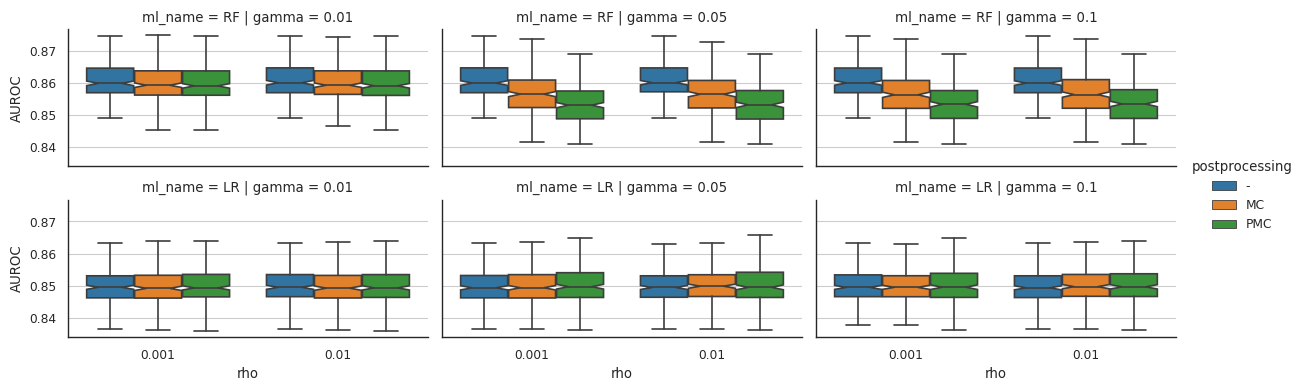

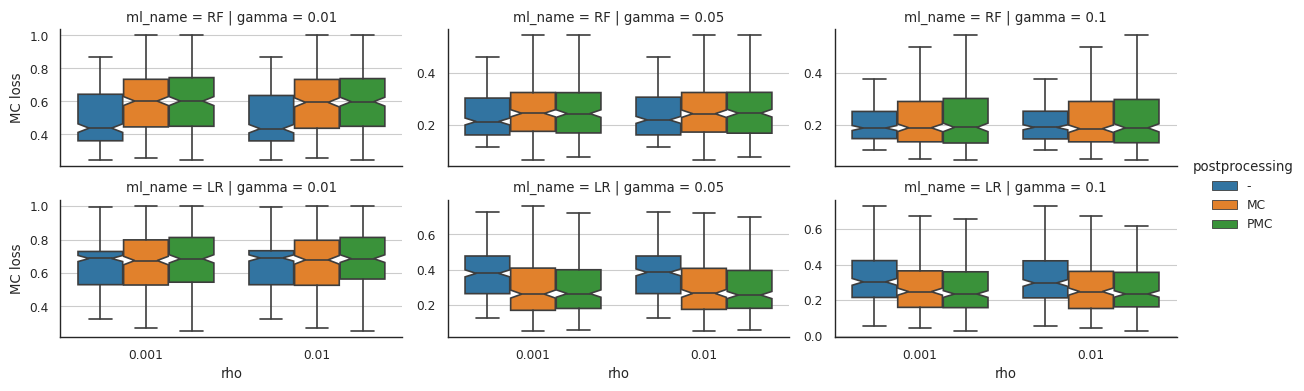

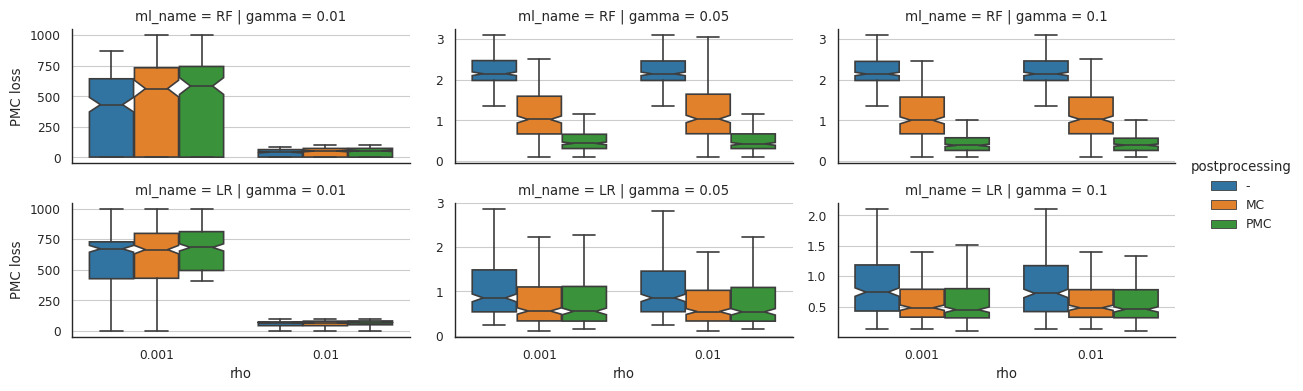

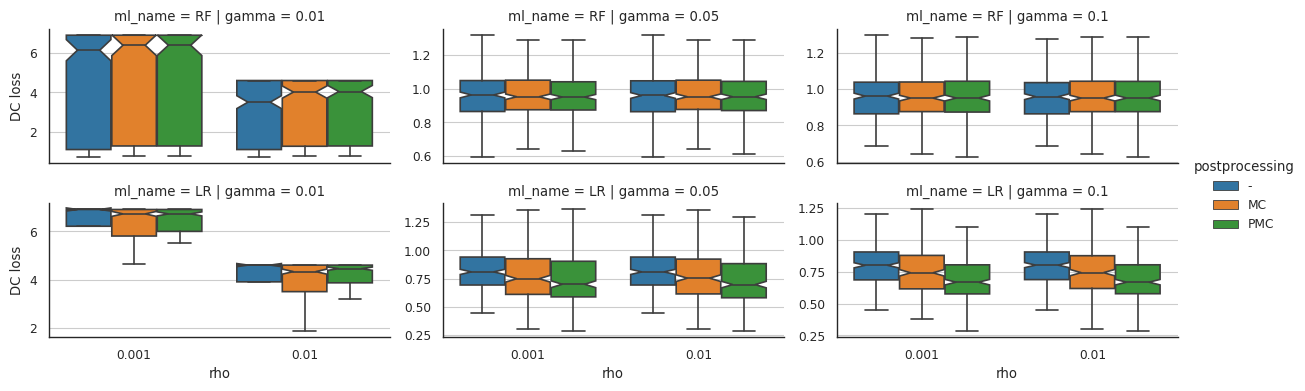

In [125]:
sns.set_style('white')
df_plt = df_results.copy()
df_plt = (df_plt
          .rename(columns=nice_names) 
#           .loc[df_plt.gamma!=0.01]
         )
for level,nicety in nice_levels.items():
    df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)
x,row,col,hue=('rho','ml_name','gamma','postprocessing') 
df_plt['alpha'] = df_plt['alpha'].astype(str)
for m in [nice_names[t] if t in nice_names else t for t in test_metrics]:
    print(m)
    print('----------------------------------------')
    g=sns.catplot(
######################################## 
        # box options
        kind='box',
        notch=True,
        showfliers=False,
######################################## 
        # point options
#         kind='point',
#         dodge=0.25,
#         join=False,
#         estimator=np.median,
######################################## 
        data=df_plt,
        y=m,
        x=x,
        hue_order=['-','MC','PMC'],
        hue=hue,
        row=row,
        col=col,
#         facet_kws=dict(sharey='row'),
#         sharey="row",
#         facet_kws=dict(sharey=False),
        sharey= (m=='AUROC'),
        aspect=2,
        height=2
    )
# g.set(grid=True,axis='y')
    for ax in g.axes.flat:
        ax.yaxis.grid(True)
#         ax.set_ylabel('')

# side by side metrics plot
- make metrics a melted variable
- plot metrics as columns, values as y, algs as x

In [118]:
df.variable.unique()

array(['dataset', 'params', 'process_time', 'time_time', 'text_encoding',
       'text_features', 'random_state', 'roc_auc_train', 'auprc_train',
       'accuracy_train', 'MC_loss_train', 'PMC_loss_train',
       'DC_loss_train', 'AUROC', 'AUPRC', 'accuracy_test', 'MC loss',
       'PMC loss', 'DC loss', 'feature_importances_', 'ml_name',
       'postprocessing'], dtype=object)

AUROC
MC loss
PMC loss


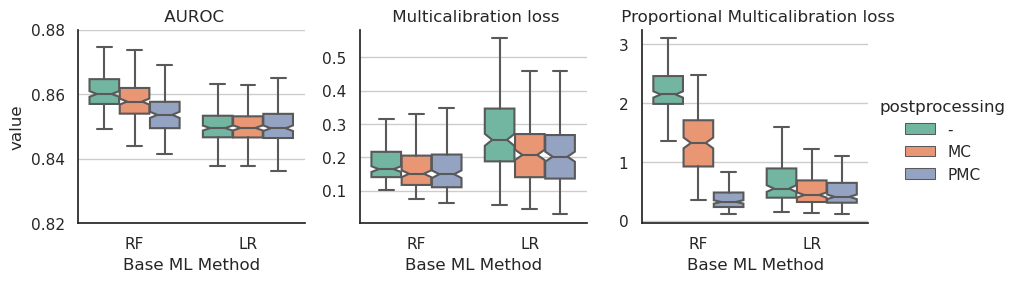

In [148]:
sns.set_style('white')
sns.set_theme(style='white',
              font_scale=1,
              palette='Set2'
             )
df_plt = df_results.copy()
df_plt = (df_plt
          .rename(columns=nice_names) 
          .loc[df_plt.gamma==0.1]
          .loc[df_plt.alpha==0.1]
          .loc[df_plt.rho==0.001]
         )
test_metrics = ['AUROC','MC loss','PMC loss']
for level,nicety in nice_levels.items():
    df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)
    
df_plt = (df_plt
          .melt(id_vars = ['algorithm',
                           'ml_name',
                           'postprocessing',
                           'alpha',
                           'gamma',
                           'rho',
                           'n_bins',
                           ]
               )
         )
df_plt = df_plt.loc[df_plt.variable.isin(test_metrics)]
x,row,col,hue=('alpha','ml_name','gamma','postprocessing') 
g = sns.catplot(
# ######################################## 
#         # box options
    kind='box',
    notch=True,
    showfliers=False,
# ######################################## 
#         # point options
#     kind='point',
#     dodge=0.25,
#     join=False,
#     estimator=np.median,
# ######################################## 
    data=df_plt,
    x='ml_name',
    hue='postprocessing',
    hue_order=['-','MC','PMC'],
    y='value',
    col='variable',
    sharey=False,
    aspect=1,
    height=3
)
for k,ax in g.axes_dict.items():
    print(k)
    ax.yaxis.grid(True)
    ax.set_xlabel('Base ML Method')
    title = (ax.get_title()
             .split('=')[-1]
             .replace('PMC','Proportional Multicalibration')
             .replace('MC','Multicalibration')
             .replace('DC','Privacy')
            )
    ax.set_title(title)
    if 'AUROC' in k:
        ax.set_ylim(0.82, 0.88)
        
save(g,'bch_pmc_results')        

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LR_MC vs. LR_PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=3.783e+03
RF_- vs. RF_MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=4.818e+03
RF_MC vs. RF_PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.371e-08 U_stat=6.077e+03
LR_- vs. LR_MC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=4.067e+03
LR_- vs. LR_PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=4.280e+03
RF_- vs. RF_PMC: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:2.910e-12 U_stat=7.105e+03
AUROC
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
  

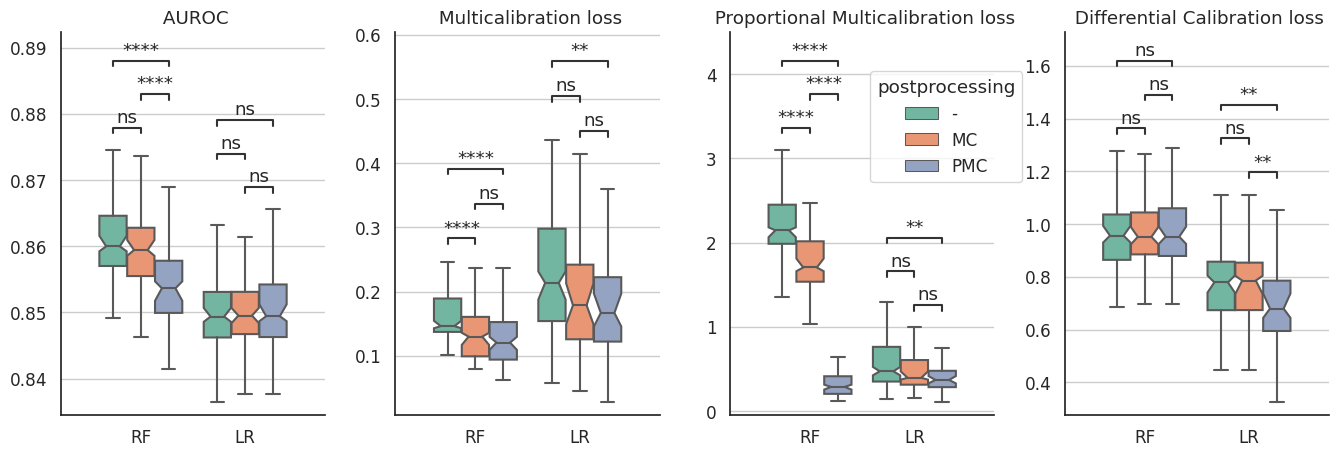

In [135]:
sns.set_theme(style='white',
              font_scale=1.1,
              palette='Set2'
             )
df_plt = df_results.copy()
df_plt = (df_plt
          .rename(columns=nice_names) 
          .loc[df_plt.gamma==0.1]
          .loc[df_plt.alpha==0.1]
          .loc[df_plt.rho==0.001]
         )
df_plt = df_plt.rename(columns=nice_names) 
for level,nicety in nice_levels.items():
    df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)
    
df_plt['ml_name'] = df_plt['ml_name'].apply(lambda x: x.upper()) 
df_plt = (df_plt
          .melt(id_vars = ['algorithm',
                           'ml_name',
                           'postprocessing',
                           'alpha',
                           'gamma',
                           'rho',
                           'n_bins',
                           ]
               )
         )
df_plt = df_plt.loc[df_plt.variable.isin(test_metrics)]
df_plt['value'] = df_plt['value'].astype(float)

shared_args = dict(
    x='ml_name',
    y='value',
    hue='postprocessing',
    hue_order=['-','MC','PMC']
)
g = sns.catplot(
# ######################################## 
#         # box options
    kind='box',
    notch=True,
    showfliers=False,
    bootstrap=1000,
# ######################################## 
#         # point options
#     kind='point',
#     dodge=0.25,
#     join=False,
#     estimator=np.median,
#     errorbar=('pi',95),
# ######################################## 
    data=df_plt,
    col='variable',
    **shared_args,
    sharey=False,
    aspect=.7,
#     height=3,
#     palette=sns.color_palette('Set3')
)
sns.move_legend(g, [0.65,0.6], frameon=True)
pairs = [
    (('RF','-'),('RF','MC')),
    (('RF','-'),('RF','PMC')),
    (('RF','MC'),('RF','PMC')),
    (('LR','-'),('LR','MC')),
    (('LR','-'),('LR','PMC')),
    (('LR','MC'),('LR','PMC')),
]
for k,ax in g.axes_dict.items():
    df_ax = df_plt.loc[df_plt.variable==k]
#     import ipdb 
#     ipdb.set_trace()
    annotator = Annotator(
        ax,
        pairs, 
        data=df_ax, 
        **shared_args,
    )
    annotator.configure(test='Mann-Whitney', 
                        comparisons_correction="Bonferroni",
                        text_format='star', 
                        loc='inside')
    annotator.apply_and_annotate()
    
    print(k)
    ax.yaxis.grid(True)
    ax.set_xlabel('Base ML Method')
    title = (ax.get_title()
             .split('=')[-1]
             .replace('PMC','Proportional Multicalibration')
             .replace('MC','Multicalibration')
             .replace('DC','Differential Calibration')
            )
    ax.set_title(title)
        
    ax.set_ylabel('')
    ax.set_xlabel('')
        
save(g,'box_AUROC_MC_PMC_DC')    

In [120]:
from statannotations.Annotator import Annotator
import ipdb
# sns.set_style('whitegrid')

def make_plot(df_results, kind='box', plot_kwargs={}, facet_kwargs={}):
    df_plt = df_results.copy()
    df_plt = df_plt.rename(columns=nice_names) 
    for level,nicety in nice_levels.items():
        df_plt[level] = df_plt[level].apply(lambda x: nicety[x] if x in nicety else x)

    order=list(df_plt.groupby('algorithm').groups.keys())

    common_plot_kwargs = dict(
          order=order,
#           orient="h",
#           palette="Spectral",
    )
    common_plot_kwargs.update(plot_kwargs)
    
    plot_args = dict(
       box=dict( 
            func=sns.boxplot, 
            showfliers=False,
            notch=True,
            dodge=False,
       ),
       point=dict(
          func=sns.pointplot, 
#           size=10,
#           jitter=False,
          join=False,
       ),
       violin=dict(  
          func=sns.violinplot, 
          dodge=False,
       )
    )
    
    x_vars=[
        'AUROC',
        'MC loss',
        'PMC loss',
        'DC loss'
    ]
    pairgrid_kwargs = dict(
        data=df_plt, 
        x_vars=x_vars,
        x_vars=['algorithm'],
        hue='postprocessing',
        aspect=0.8
    )
    pairgrid_kwargs.update(facet_kwargs)
    g = sns.PairGrid( **pairgrid_kwargs )

    # Draw a dot plot 
    g.map(**plot_args[kind],**common_plot_kwargs)
    # stat annotation pairs
    pairs=[
           ("LR", "LR+MC"), ("LR", "LR+PMC"), ("LR+MC", "LR+PMC"),
           ("RF", "RF+MC"), ("RF", "RF+PMC"), ("RF+MC", "RF+PMC")
          ]

    for (ax,x) in zip(g.axes.flat, x_vars):
        ax.yaxis.grid(True)
        ax.xaxis.grid(False)
#         ax.set_ylabel('')
        xticks = ax.get_xticks()
        xticklabs = ax.get_xticklabels()
#             ax.set_xtick
        print(x)
        print('.......')
        annotator = Annotator(
            ax,
            pairs, 
            data=df_plt, 
            y=x, 
            x='algorithm', 
    #             hue='postprocessing',
#             orient='h',
            order=order
        )
        annotator.configure(test='Mann-Whitney', 
                            comparisons_correction="Bonferroni",
                            text_format='star', 
                            loc='inside')
        annotator.apply_and_annotate()
        print('........................................')
        
        if x == 'PMC loss':
            ax.set_xlim(left=0.0)
#         if x == 'AUROC':
#             ax.set_xticks(xticks)
#             ax.set_xticklabels(xticklabs)
#             ax.set_xticklabels(ax.get_xticklabels())
#             ax.set_xlim(ax.get_xlim())
#             newxticklabs = ax.get_xticklabels()
    save(g, f'{kind}_AUROC_MC_PMC_DC')
    return g

SyntaxError: keyword argument repeated: x_vars (352952435.py, line 45)

In [ ]:
df_tmp = df_results.loc[~df_results.algorithm.str.contains('xgb')]
g = make_plot(
#     df_results, 
    df_tmp,
    kind='point', 
    plot_kwargs=dict(
#         saturation=0.5,
        ci=99,
#         legend_out=True,
        estimator=np.median
    ),
    facet_kwargs=dict(
        aspect=.85,
    )
)

In [ ]:
make_plot(
    df_results, kind='box', 
    plot_kwargs=dict(saturation=0.9,
                     palette='Set2'
                    ),
    facet_kwargs=dict(aspect=0.85)
)

In [ ]:
make_plot(df_results, kind='violin')

In [ ]:
# pct difference btw RF / LR with and without PMC/MC

df_results
df = df_tbl.groupby('algorithm')[test_metrics].apply(np.mean)

for metric in test_metrics:
    print(metric)
    for m in ['LR','RF']:
#         print('\t',m)
        for post in ['MC','PMC']:
#             print('\t\t',post)
            a = df.loc[m,metric] 
            b = df.loc[f'{m}+{post}',metric]
            pct= 100*((a-b)/a)
            print('\t\t\t',m,post,'% diff:',round(pct,2))
    print('---')